In [2]:
import numpy as np
import pandas as pd

import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

Running


/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Text(0, 0.5, 'Number of Trees')

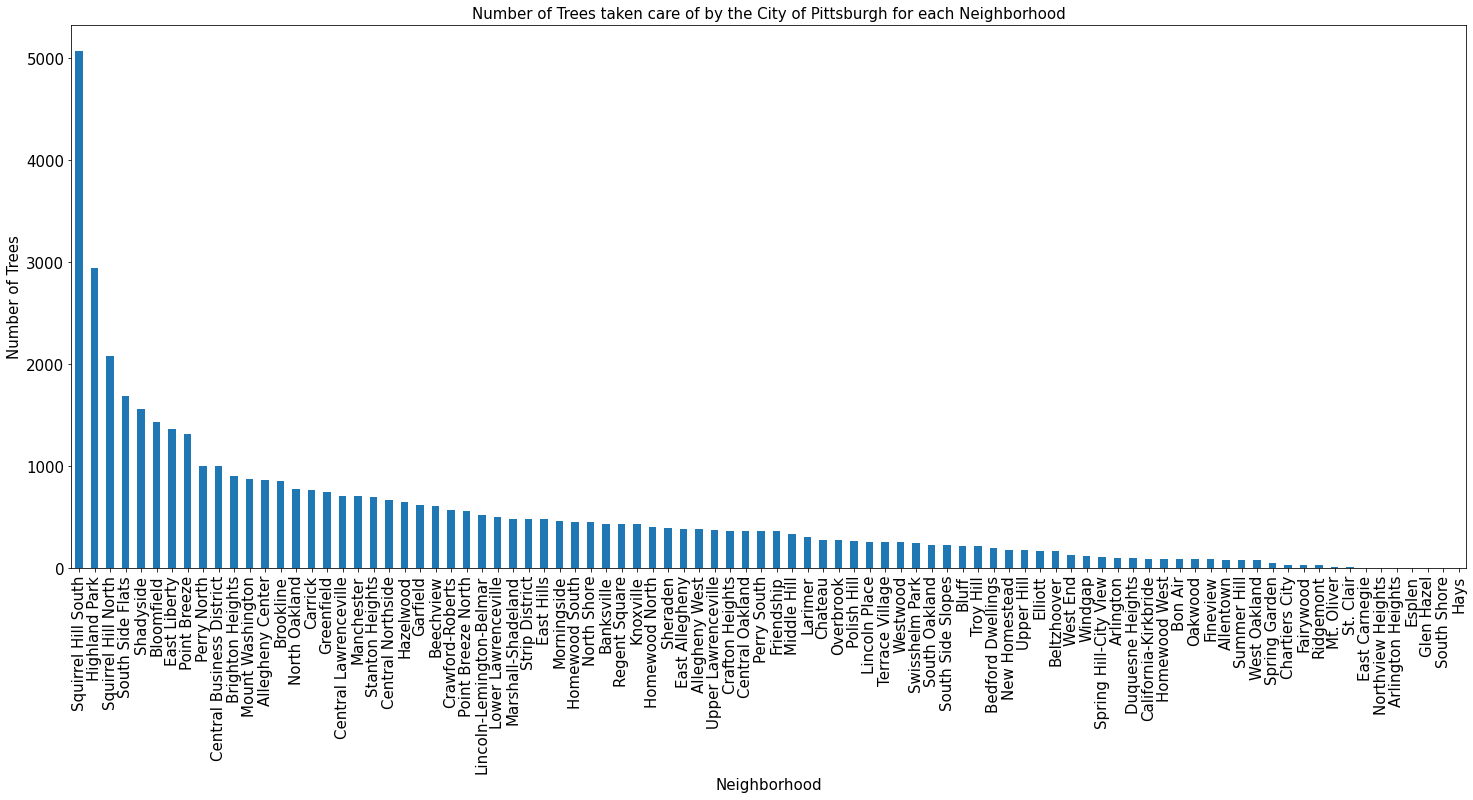

In [3]:
data = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da")
data = data.groupby('neighborhood').count()

sortedData = data[['id']].sort_values(by='id', ascending=False)


Visual = sortedData.plot(kind='bar', figsize=(25,10),legend=False, fontsize=15)

Visual.set_title("Number of Trees taken care of by the City of Pittsburgh for each Neighborhood", fontsize=15)
Visual.set_xlabel('Neighborhood', fontsize = 15)
Visual.set_ylabel('Number of Trees', fontsize = 15)

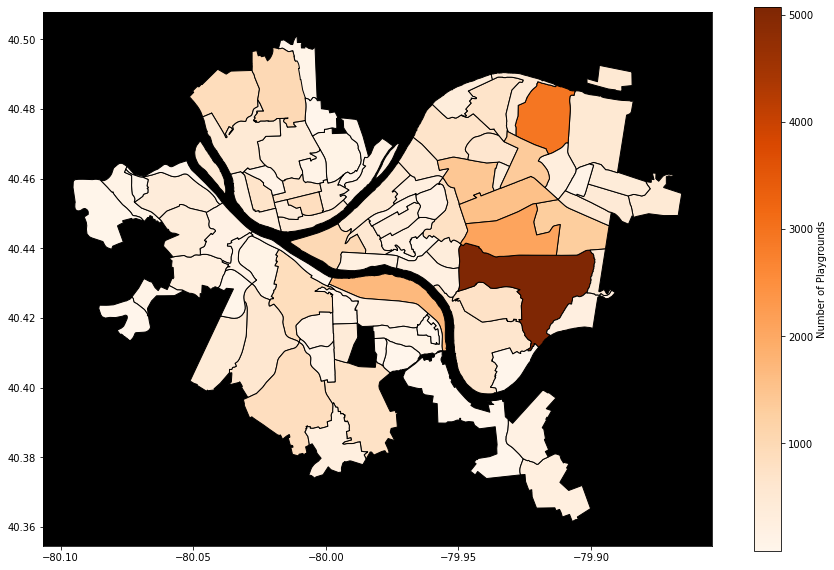

In [6]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
tree_map = neighborhoods.merge(sortedData, how="left", left_on="hood", right_on="neighborhood")
map = tree_map.plot(column = 'id',
             cmap = 'Oranges',
             edgecolor = "Black",
             legend=True,
             legend_kwds={'label': "Number of Playgrounds"},
             figsize = (15, 10))
map.set_facecolor((0, 0, 0))